In [1]:
import pandas as pd

# Load the datasetCardiovascular_Disease_Dataset.csv
file_path = '/content/Cardiovascular_Disease_Dataset.csv'  # Update the path if necessary
df = pd.read_csv(file_path)

# Display the first few rows
print(df.head())


   patientid  age  gender  chestpain  restingBP  serumcholestrol  \
0     103368   53       1          2        171                0   
1     119250   40       1          0         94              229   
2     119372   49       1          2        133              142   
3     132514   43       1          0        138              295   
4     146211   31       1          1        199                0   

   fastingbloodsugar  restingrelectro  maxheartrate  exerciseangia  oldpeak  \
0                  0                1           147              0      5.3   
1                  0                1           115              0      3.7   
2                  0                0           202              1      5.0   
3                  1                1           153              0      3.2   
4                  0                2           136              0      5.3   

   slope  noofmajorvessels  target  
0      3                 3       1  
1      1                 1       0  
2    

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Drop the patientid column (not needed for prediction)
df = df.drop(columns=['patientid'])

# Define features (X) and target (y)
X = df.drop(columns=['target'])
y = df['target']

# Optional: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [3]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [4]:
# Predict on the test set
y_pred = model.predict(X_test)

# Example: Predicting for a new individual
# Example input: [age, gender, chestpain, restingBP, serumcholestrol, fastingbloodsugar, restingrelectro, maxheartrate, exerciseangia, oldpeak, slope, noofmajorvessels]
new_individual = [[55, 1, 0, 140, 200, 0, 1, 150, 0, 2.3, 2, 0]]
new_individual_scaled = scaler.transform(new_individual)
prediction = model.predict(new_individual_scaled)

risk = "High Risk" if prediction[0] == 1 else "Low Risk"
print(f"The predicted risk level is: {risk}")


The predicted risk level is: High Risk


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


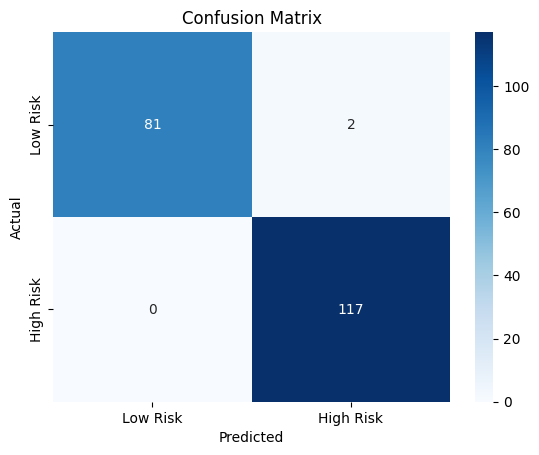

In [5]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Low Risk', 'High Risk'], yticklabels=['Low Risk', 'High Risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [6]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X_scaled, y, cv=5)  # 5-fold cross-validation

print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean() * 100:.2f}%")


Cross-validation scores: [0.965 1.    0.96  0.985 0.965]
Average cross-validation score: 97.50%


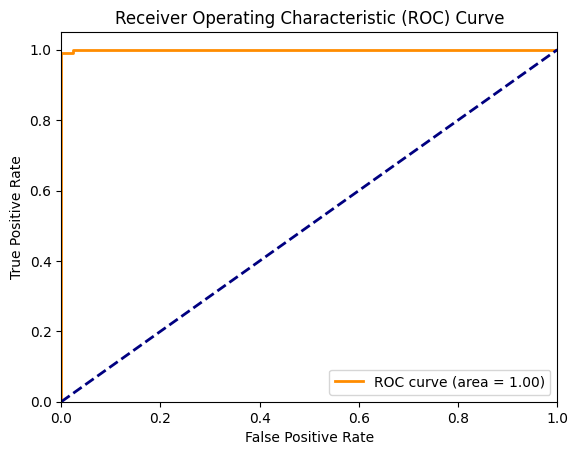

In [7]:
from sklearn.metrics import roc_curve, auc

# Predict probabilities for ROC curve
y_prob = model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [8]:
# Assume this is the new individual's data:
# Example input: [age, gender, chestpain, restingBP, serumcholestrol, fastingbloodsugar, restingrelectro, maxheartrate, exerciseangia, oldpeak, slope, noofmajorvessels]
new_individual = [[55, 1, 0, 140, 200, 0, 1, 150, 0, 2.3, 2, 0]]

# Step 1: Scale the new data
new_individual_scaled = scaler.transform(new_individual)

# Step 2: Predict using the trained model
prediction = model.predict(new_individual_scaled)

# Step 3: Interpret the prediction
risk = "High Risk" if prediction[0] == 1 else "Low Risk"
print(f"The predicted risk level is: {risk}")


The predicted risk level is: High Risk


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
